
<br>
<font>
<!-- <img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" alt="SUT logo" width=300 height=300 align=left class="saturate"> -->
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=200 height=200>
<br>
<font color=0F5298 size=7>
Machine Learning <br>
<font color=2565AE size=5>
Electrical Engineering Department <br>
Spring 2024<br>
<font color=3C99D size=5>
Practical Assignment 4 <br>
<font color=696880 size=4>
<!-- <br> -->


____

# Personal Data

In [1]:
student_number = '400101078'
first_name = 'Tina'
last_name = 'Halimi'

# Introduction

In this assignment, we will be performing clustering on Spotify songs.

# Data Preprocessing

In the next cell, import the libraries you'll need.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE


In the `spotify.csv` file, load the data. Exclude unrelated features and retain only the track name and the features you believe are relevant.

In [3]:
file_path = 'spotify.csv'
spotify_data = pd.read_csv(file_path)

spotify_data.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [4]:
spotify_data.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

In [5]:
relevant_features = ['track_name', 'track_artist', 'playlist_genre', 'playlist_subgenre', 'danceability', 'energy', 'key', 'mode', 'speechiness', 
                     'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

spotify_relevant_withName = spotify_data[relevant_features]

spotify_relevant_withName.head()

,track_name,track_artist,playlist_genre,playlist_subgenre,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,pop,dance pop,0.748,0.916,6,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,Memories - Dillon Francis Remix,Maroon 5,pop,dance pop,0.726,0.815,11,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,All the Time - Don Diablo Remix,Zara Larsson,pop,dance pop,0.675,0.931,1,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,Call You Mine - Keanu Silva Remix,The Chainsmokers,pop,dance pop,0.718,0.930,7,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,Someone You Loved - Future Humans Remix,Lewis Capaldi,pop,dance pop,0.650,0.833,1,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In this cell, you should implement a standard scalar function from scratch and applying it to your data. Explian importance behind using a standard scalar and the potential complications that could arise in clustering if it's not employed. (you can't use `sklearn.preprocessing.StandardScaler` but you are free to use `sklearn.preprocessing.LabelEncoder`)

In [6]:
le = LabelEncoder()
for column in ['track_artist', 'playlist_genre', 'playlist_subgenre']:
    spotify_relevant_withName[column] = le.fit_transform(spotify_relevant_withName[column])

class StandardScalerFromScratch:
    def __init__(self):
        self.means = None
        self.stds = None
    
    def fit(self, data):
        self.means = data.mean(axis=0)
        self.stds = data.std(axis=0)
    
    def transform(self, data):
        return (data - self.means) / self.stds
    
    def fit_transform(self, data):
        self.fit(data)
        return self.transform(data)

features = ['track_artist', 'playlist_genre', 'playlist_subgenre', 'danceability', 'energy', 'key', 'mode', 'speechiness', 
                     'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms'] 

# scale all features
scaler = StandardScalerFromScratch()
spotify_relevant_withName[features] = scaler.fit_transform(spotify_relevant_withName[features])

spotify_relevant_withName.head()

/var/folders/w1/6xdwk4ls5nb4d1hy_mlzx5380000gn/T/ipykernel_18354/36012249.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_relevant_withName[column] = le.fit_transform(spotify_relevant_withName[column])
/var/folders/w1/6xdwk4ls5nb4d1hy_mlzx5380000gn/T/ipykernel_18354/36012249.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_relevant_withName[column] = le.fit_transform(spotify_relevant_withName[column])
/var/folders/w1/6xdwk4ls5nb4d1hy_mlzx5380000gn/T/ipykernel_18354/36012249.py:3: Sett

,track_name,track_artist,playlist_genre,playlist_subgenre,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,I Don't Care (with Justin Bieber) - Loud Luxur...,-0.810832,-0.259072,-1.265957,0.642039,1.201596,0.173197,0.876164,-0.481355,-0.333893,-0.377947,-0.809217,0.031907,0.042926,-0.518866
1,Memories - Dillon Francis Remix,0.252901,-0.259072,-1.265957,0.490404,0.643307,1.557603,0.876164,-0.688631,-0.468663,-0.359172,1.081044,0.782510,-0.777186,-1.056252
2,All the Time - Don Diablo Remix,1.648446,-0.259072,-1.265957,0.138887,1.284510,-1.211209,-1.141305,-0.324417,-0.436792,-0.377843,-0.519554,0.439377,0.116225,-0.822004
3,Call You Mine - Keanu Silva Remix,1.261546,-0.259072,-1.265957,0.435264,1.278982,0.450078,0.876164,-0.050023,-0.667632,-0.377905,0.089580,-1.001780,0.039953,-0.947735
4,Someone You Loved - Future Humans Remix,0.033196,-0.259072,-1.265957,-0.033425,0.742804,-1.211209,0.876164,-0.702450,-0.432694,-0.377947,-0.692574,0.919763,0.115035,-0.614163


In [7]:
spotify_relevant = spotify_relevant_withName.drop(columns=['track_name'])

# Dimensionality Reduction

One method for dimensionality reduction is Principal Component Analysis (PCA). Use its implementation from the `sklearn` library to reduce the dimensions of your data. Then, by using an appropriate cut-off for the `_explained_variance_ratio_` in the PCA algorithm, determine the number of principal components to retain.

Number of components to retain 95% variance: 13


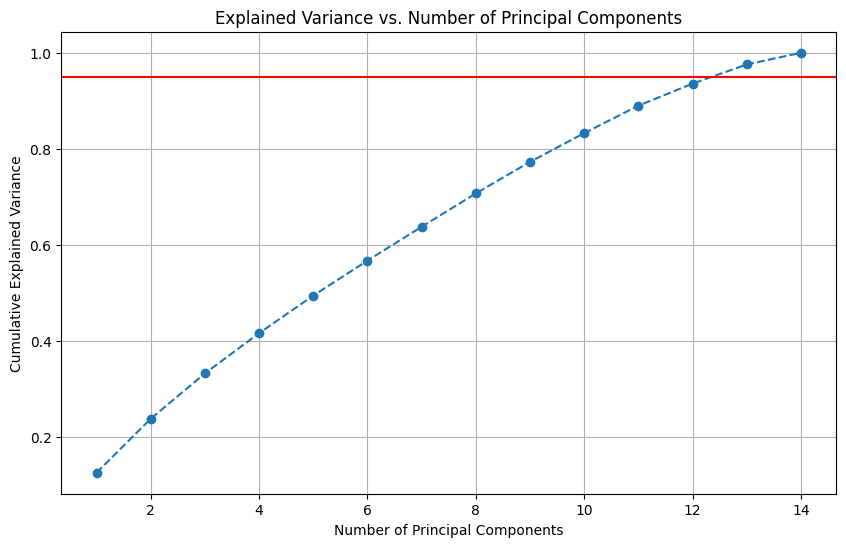

Shape of the data after PCA: (32833, 13)


In [8]:
pca = PCA()
X_pca = pca.fit_transform(spotify_relevant)

# Calculate explained variance ratio and cumulative explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

threshold = 0.95
num_components = np.argmax(cumulative_explained_variance >= threshold) + 1

print(f"Number of components to retain 95% variance: {num_components}")

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.axhline(y=threshold, color='r', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Principal Components')
plt.grid(True)
plt.show()

pca = PCA(n_components=num_components)
X_reduced = pca.fit_transform(spotify_relevant)

print(f"Shape of the data after PCA: {X_reduced.shape}")

# Clustering

Implement K-means for clustering from scratch.

In [9]:
# Define the modified KMeansFromScratch class
class KMeansFromScratch:
    def __init__(self, n_clusters=3, max_iters=100, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.tol = tol
        self.centroids = None
        self.labels = None
    
    def initialize_centroids(self, X):
        np.random.seed(42)
        random_indices = np.random.permutation(X.shape[0])
        centroids = X[random_indices[:self.n_clusters]]
        return centroids
    
    def assign_clusters(self, X, centroids):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        return labels
    
    def update_centroids(self, X, labels):
        centroids = np.array([X[labels == i].mean(axis=0) for i in range(self.n_clusters)])
        return centroids
    
    def fit(self, X):
        self.centroids = self.initialize_centroids(X)
        
        for _ in range(self.max_iters):
            labels = self.assign_clusters(X, self.centroids)
            new_centroids = self.update_centroids(X, labels)
            
            if np.linalg.norm(self.centroids - new_centroids) < self.tol:
                break
            
            self.centroids = new_centroids
        
        self.labels = labels
        return self.centroids, self.labels
    
    def predict(self, X):
        return self.assign_clusters(X, self.centroids)

Using the function you've created to execute the K-means algorithm eight times on your data, with the number of clusters ranging from 2 to 9. For each run, display the genre of each cluster using the first two principal components in a plot.

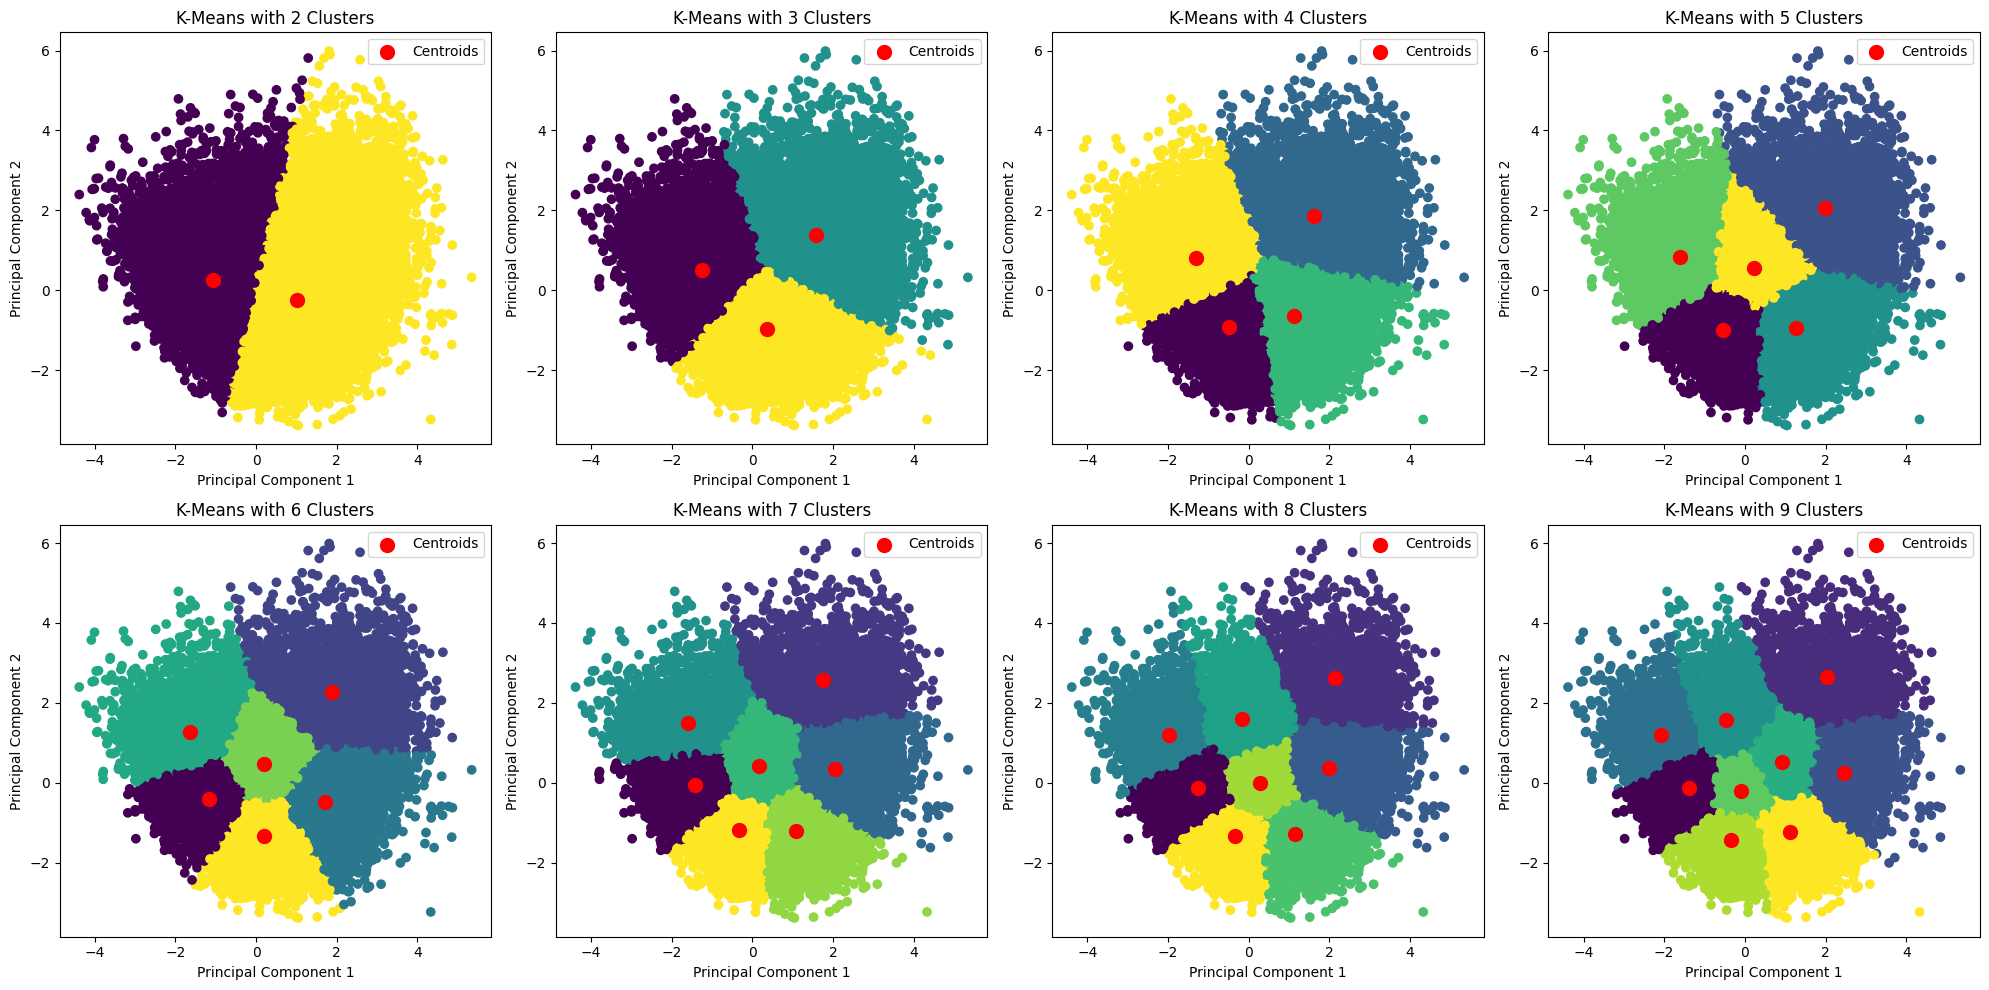

In [10]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(spotify_relevant)

cluster_range = range(2, 10)
num_plots = len(cluster_range)

fig, axs = plt.subplots(2, 4, figsize=(20, 10))
axs = axs.flatten()

for i, k in enumerate(cluster_range):
    kmeans = KMeansFromScratch(n_clusters=k)
    centroids, labels = kmeans.fit(data_pca)
    
    # Plotting the first two principal components with cluster labels
    axs[i].scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis', marker='o')
    axs[i].scatter(centroids[:, 0], centroids[:, 1], s=100, c='red', label='Centroids')
    axs[i].set_title(f'K-Means with {k} Clusters')
    axs[i].set_xlabel('Principal Component 1')
    axs[i].set_ylabel('Principal Component 2')
    axs[i].legend()

plt.tight_layout()
plt.show()

The Silhouette score and the Within-Cluster Sum of Squares (WSS) score are two metrics used to assess the quality of your clustering. You can find more information about these two methods [here](https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb). Plot the Silhouette score and the WSS score for varying numbers of clusters, and use these plots to determine the optimal number of clusters (k).

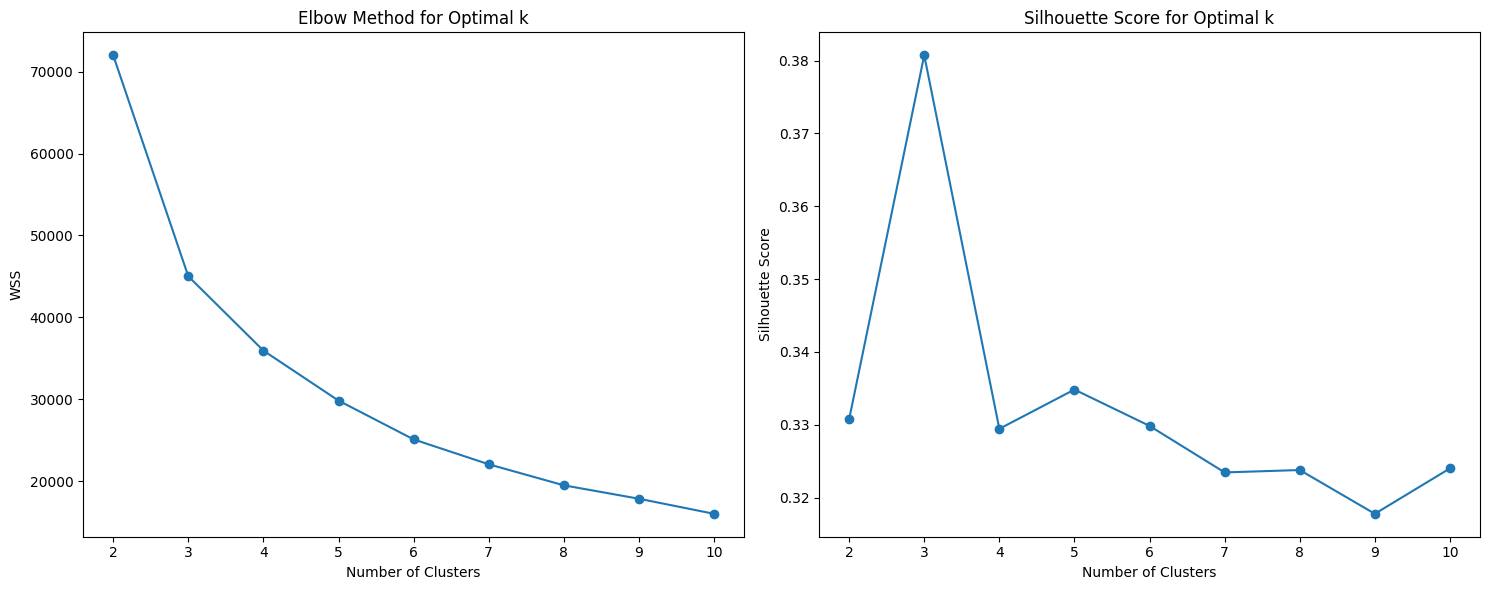

In [11]:
# Calculate WSS and Silhouette scores for different numbers of clusters
wss = []
silhouette_scores = []
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeansFromScratch(n_clusters=k)
    centroids, labels = kmeans.fit(data_pca)
    
    # Calculate WSS
    wss_value = np.sum([np.sum((data_pca[labels == i] - centroids[i]) ** 2) for i in range(k)])
    wss.append(wss_value)
    
    # Calculate Silhouette Score
    silhouette_avg = silhouette_score(data_pca, labels)
    silhouette_scores.append(silhouette_avg)

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot WSS
axs[0].plot(cluster_range, wss, marker='o')
axs[0].set_xlabel('Number of Clusters')
axs[0].set_ylabel('WSS')
axs[0].set_title('Elbow Method for Optimal k')

# Plot Silhouette scores
axs[1].plot(cluster_range, silhouette_scores, marker='o')
axs[1].set_xlabel('Number of Clusters')
axs[1].set_ylabel('Silhouette Score')
axs[1].set_title('Silhouette Score for Optimal k')

plt.tight_layout()
plt.show()


Based on the plots:

1. **Elbow Method (WSS)**: The "elbow" point in the WSS plot suggests a significant drop in WSS when the number of clusters increases from 2 to 3. After that, the reduction rate diminishes. This suggests that `k=3` might be a good choice.

2. **Silhouette Score**: The peak of the Silhouette score is at `k=3`, indicating the best clustering quality at this number of clusters.

Thus, both the Elbow Method and the Silhouette Score suggest that the optimal number of clusters is 3.

# Checking Output

To see how good was our clustering we will use a sample check and t-SNE method.

first randomly select two song from every cluster and see how close these two songs are.

In [12]:
import random

optimal_k = 3
kmeans = KMeansFromScratch(n_clusters=optimal_k)
centroids, labels = kmeans.fit(data_pca)

spotify_relevant_withName['Cluster'] = labels

# Function to randomly select two songs from each cluster and compare their features
def compare_songs_in_clusters(df, num_clusters):
    for cluster in range(num_clusters):
        cluster_songs = df[df['Cluster'] == cluster]
        if len(cluster_songs) >= 2:
            selected_songs = cluster_songs.sample(2, random_state=42)
            print(f"\nCluster {cluster}:")
            print(selected_songs[relevant_features].to_string(index=False))

compare_songs_in_clusters(spotify_relevant_withName, optimal_k)



Cluster 0:
track_name  track_artist  playlist_genre  playlist_subgenre  danceability   energy       key      mode  speechiness  acousticness  instrumentalness  liveness   valence     tempo  duration_ms
    Closer      0.020310       -1.429501           0.647331      -0.57104 0.665418 -0.934327 -1.141305    -0.728112     -0.791657         -0.329782 -0.318669 -0.735852 -1.075548      0.76634
   Therapy      1.381385       -1.429501           0.647331      -1.03973 1.091044  1.280722 -1.141305    -0.622500     -0.789973         -0.251292 -0.364030 -2.021313  1.079961     -1.25425

Cluster 1:
       track_name  track_artist  playlist_genre  playlist_subgenre  danceability    energy      key      mode  speechiness  acousticness  instrumentalness  liveness   valence    tempo  duration_ms
Pray You Catch Me     -1.377168        0.326143           1.677564     -2.790424 -2.673258 0.726960 -1.141305    -0.691592      2.079229         -0.058186  1.366171 -1.869906 2.005041    -0.498259
       Sa

/var/folders/w1/6xdwk4ls5nb4d1hy_mlzx5380000gn/T/ipykernel_18354/2242368742.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_relevant_withName['Cluster'] = labels


Using t-SNE reduce dimension of data pointe to 2D and plot it to check how good datapoints are clustered (implementing this part is optional and have extra points)

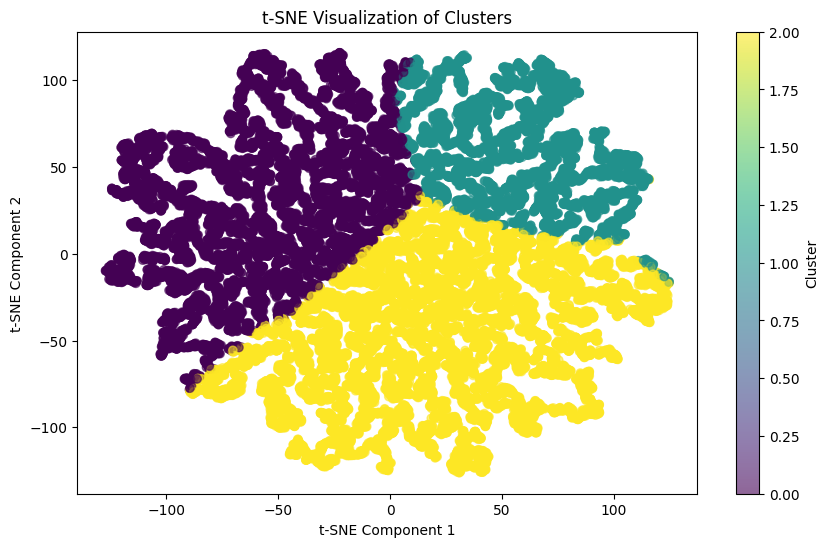

In [14]:
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(data_pca)

plt.figure(figsize=(10, 6))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=labels, cmap='viridis', marker='o', alpha=0.6)
plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster')
plt.show()